In [1]:
%matplotlib inline
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
train_labels = []
train_samples = []

Story:
For the people who have watched "Rise of the Planet of Apes", this story will be familiar.

A pharmaceutical chemist William Rodman is testing a viral based drug named ALZ-112 at Gen-Sys labs. A female chimp marked as Test Subject-09 is introduced to the drug and shows signs of remarkable intelligence. This also causes the chimps irises turn flexi green and hence the name, Bright Eyes. This drug was originally developed to treat Alzhimers, but its being tested on the chimps first. Later William introduces this drug to his father who also is suffering from alzheimers but unlike Bright Eyes he suffers some side effects.

Our objective here is predict if a perso of certain age is intruduced to the drug will he/she show the signs of side effects or not.

The drug will be tested on individuals from ages 30 to 100 in a clinical trial.
The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
Around 95% of the patients of age 65 or older experinced side effects.
Around 95% of patients of age under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(30, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(30, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    #The ~95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
# for i in train_samples:
#     print(i)

64
71
36
88
49
93
32
86
51
67
52
86
44
70
44
91
54
68
53
79
55
92
35
97
56
68
52
95
56
92
56
75
54
88
50
97
60
78
33
94
64
89
38
89
36
68
43
73
40
72
34
83
43
90
38
67
46
68
42
85
58
77
40
94
31
78
31
97
36
96
52
68
52
82
44
90
59
85
62
81
64
69
40
95
50
93
41
89
47
95
42
74
40
76
61
73
49
69
58
98
63
67
37
68
41
67
62
67
31
83
45
65
42
87
62
89
34
83
44
84
31
77
39
93
37
66
50
91
57
79
33
72
45
98
50
94
31
71
47
77
43
70
38
100
43
96
59
95
42
100
49
78
51
72
48
80
37
80
47
89
30
84
53
91
30
79
54
65
64
79
60
75
63
77
39
73
41
71
58
82
44
98
62
97
46
66
47
90
56
97
31
91
55
81
46
95
55
78
54
90
59
85
51
87
30
85
40
67
41
96
53
83
56
100
50
70
54
79
60
93
41
90
58
78
36
75
43
84
53
68
38
73
40
79
62
80
58
89
36
92
38
70
38
82
36
68
39
99
30
66
54
68
46
65
35
97
54
75
57
91
53
100
32
68
45
81
45
79
59
78
61
85
43
97
58
77
35
92
62
90
35
66
53
97
39
92
41
86
44
82
39
100
56
84
37
94
55
98
60
89
63
96
52
79
40
96
39
71
57
87
53
81
54
76
59
90
58
95
42
71
63
83
32
65
37
95
34
91
55
87
63
88

In [5]:
# for i in train_labels:
#     print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [8]:
# for i in train_samples:
#     print(i)

[0.78571429]
[0.18571429]
[0.34285714]
[0.71428571]
[0.31428571]
[0.24285714]
[0.68571429]
[0.02857143]
[0.34285714]
[0.24285714]
[0.14285714]
[0.22857143]
[0.47142857]
[0.52857143]
[0.64285714]
[0.95714286]
[0.1]
[0.2]
[0.11428571]
[0.74285714]
[0.92857143]
[0.12857143]
[0.82857143]
[0.92857143]
[0.21428571]
[0.55714286]
[0.37142857]
[0.48571429]
[0.5]
[0.52857143]
[0.7]
[0.8]
[0.67142857]
[0.41428571]
[0.75714286]
[0.7]
[0.22857143]
[0.4]
[0.21428571]
[0.41428571]
[1.]
[0.64285714]
[0.42857143]
[0.98571429]
[0.6]
[0.87142857]
[0.95714286]
[0.78571429]
[0.57142857]
[0.18571429]
[0.85714286]
[0.37142857]
[0.87142857]
[0.15714286]
[0.22857143]
[0.12857143]
[0.72857143]
[0.58571429]
[0.57142857]
[0.87142857]
[0.35714286]
[0.11428571]
[0.1]
[0.87142857]
[0.64285714]
[0.08571429]
[0.87142857]
[0.14285714]
[0.58571429]
[0.37142857]
[0.95714286]
[0.28571429]
[0.78571429]
[0.67142857]
[0.51428571]
[0.21428571]
[0.64285714]
[0.7]
[0.97142857]
[0.34285714]
[0.7]
[0.22857143]
[0.78571429]
[0.357

In [9]:
model = models.Sequential([])

model.add(layers.Dense(16, input_shape=(1,), activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [12]:
history = model.fit(train_samples, train_labels, batch_size=10, epochs=10, validation_split=0.1, verbose=2)

Epoch 1/10
189/189 - 3s - loss: 0.5921 - accuracy: 0.7053 - val_loss: 0.4635 - val_accuracy: 0.8619
Epoch 2/10
189/189 - 1s - loss: 0.3630 - accuracy: 0.9159 - val_loss: 0.3085 - val_accuracy: 0.9429
Epoch 3/10
189/189 - 1s - loss: 0.2821 - accuracy: 0.9439 - val_loss: 0.2777 - val_accuracy: 0.9429
Epoch 4/10
189/189 - 0s - loss: 0.2646 - accuracy: 0.9423 - val_loss: 0.2632 - val_accuracy: 0.9333
Epoch 5/10
189/189 - 0s - loss: 0.2578 - accuracy: 0.9434 - val_loss: 0.2642 - val_accuracy: 0.9429
Epoch 6/10
189/189 - 0s - loss: 0.2530 - accuracy: 0.9418 - val_loss: 0.2610 - val_accuracy: 0.9476
Epoch 7/10
189/189 - 1s - loss: 0.2491 - accuracy: 0.9429 - val_loss: 0.2681 - val_accuracy: 0.9238
Epoch 8/10
189/189 - 0s - loss: 0.2490 - accuracy: 0.9460 - val_loss: 0.2623 - val_accuracy: 0.9429
Epoch 9/10
189/189 - 0s - loss: 0.2472 - accuracy: 0.9429 - val_loss: 0.2618 - val_accuracy: 0.9429
Epoch 10/10
189/189 - 1s - loss: 0.2462 - accuracy: 0.9466 - val_loss: 0.2573 - val_accuracy: 0.9476

In [13]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

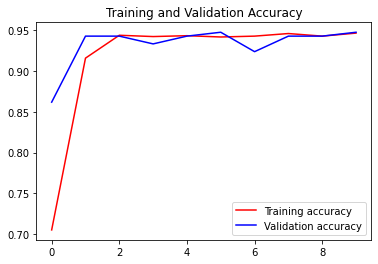

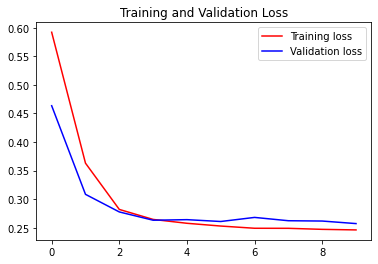

In [14]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label="Training accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [15]:
test_labels = []
test_samples = []

In [16]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(30, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    #The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(30, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    #The ~9% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [17]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [19]:
predictions = model.predict(test_samples, batch_size=10, verbose=0)

In [20]:
for i in predictions:
    print(i)

[0.9519011  0.04809899]
[0.03436248 0.9656375 ]
[0.9268341  0.07316587]
[0.82160294 0.17839701]
[0.47333762 0.5266624 ]
[0.97006446 0.02993552]
[0.5413012  0.45869884]
[0.97161794 0.02838212]
[0.01270569 0.98729426]
[0.23217297 0.76782703]
[0.9711089  0.02889103]
[0.23217297 0.76782703]
[0.01632425 0.9836758 ]
[0.97144926 0.02855078]
[0.9448132 0.0551868]
[0.01120579 0.98879427]
[0.9617133  0.03828661]
[0.00676905 0.99323094]
[0.97006446 0.02993552]
[0.03884016 0.9611598 ]
[0.9693479  0.03065208]
[0.6077621 0.392238 ]
[0.8580976  0.14190236]
[0.88814294 0.111857  ]
[0.00596573 0.99403423]
[0.5413012  0.45869884]
[0.97024107 0.02975894]
[0.97161794 0.02838212]
[0.9645086  0.03549137]
[0.97195226 0.0280477 ]
[0.01849643 0.9815036 ]
[0.7781491  0.22185084]
[0.97093743 0.02906262]
[0.9693479  0.03065208]
[0.07089635 0.9291036 ]
[0.9695286  0.03047141]
[0.97161794 0.02838212]
[0.7781491  0.22185084]
[0.08958375 0.91041625]
[0.9717856  0.02821443]
[0.9711089  0.02889103]
[0.88814294 0.111857

In [21]:
roundof_predictions = np.argmax(predictions, axis=1)

for i in roundof_predictions:
    print(i)

0
1
0
0
1
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
0
0
1
1
0
1
1
0
1
1
0
0
1
1
1
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
1
0
1
1
0
0
0
0
1
0
0
0
1
1
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
1
0
1
0
1
0
0
0
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
1
1
0
0
1
1
1
1
1
1
0
1
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
0
1
0
1
1
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1
0
1
1
0
0
1
0
1
1
0
1
0
0
1
1
0
1
1
0
1
0
1
0
0
1
1
1
0
1
1
0
1
0
1
1
1
0
1
1
0
0
1
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
0
0
0
1
0
0
1
1
0
1
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
1
1
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
1
0
0
0
1
1
1
1
0
0
1
1
1
0
0
1
1


Confusion Matrix

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=roundof_predictions)

In [23]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[200  10]
 [ 10 200]]


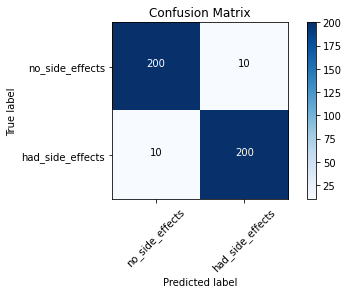

In [24]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [25]:
model.save("project-bright-eyes.h5")

In [28]:
model.get_weights()

[array([[-0.11339704, -0.02290475, -0.3805244 ,  0.5937907 , -0.31224158,
         -0.54264486, -0.10540837, -0.49727654, -0.22440004, -0.52118415,
          0.72411156, -0.44215542, -0.09537518,  0.5361283 ,  0.8042947 ,
         -0.4175814 ]], dtype=float32),
 array([ 0.2998659 ,  0.        ,  0.        , -0.17125167,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.19327077,  0.        ,  0.        , -0.16326512, -0.17874594,
         0.        ], dtype=float32),
 array([[ 5.40178418e-02, -3.46155316e-01,  4.41767238e-02,
          5.57166561e-02, -1.98609427e-01,  8.00371990e-02,
          4.50092137e-01, -2.89059430e-01, -2.09199697e-01,
          6.44105300e-03, -1.17415242e-01, -3.49780738e-01,
         -3.07794064e-01, -2.18889236e-01,  2.89511651e-01,
          6.03486717e-01,  9.28813145e-02,  2.24252015e-01,
         -1.38960332e-01,  6.67894065e-01,  1.89130493e-02,
         -3.95284928e-02, -1.67762235e-01,  2.20949680e-01,
 